In [1]:
#importing necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.api.types import is_numeric_dtype

In [ ]:
#importing dataset
df = pd.read_csv("student_performance_500.csv")

In [ ]:
#seeing top 5 row using head()
df.head()

,Study_Hours,Sleep_Hours,Attendance_Percent,Previous_Exam_Score,Final_Exam_Score
0,3.496714,7.926178,98.993554,71.675416,88.328267
1,2.861736,8.909417,94.246337,51.732214,80.371705
2,3.647689,5.601432,85.596304,47.727017,70.248906
3,4.523030,7.562969,78.530632,59.949383,83.740223
4,2.765847,6.349357,91.982233,57.447231,67.633437


In [ ]:
#seeing shape of the dataset
df.shape

(500, 5)

In [ ]:
#seeing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study_Hours          500 non-null    float64
 1   Sleep_Hours          500 non-null    float64
 2   Attendance_Percent   500 non-null    float64
 3   Previous_Exam_Score  500 non-null    float64
 4   Final_Exam_Score     500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [ ]:
#seeing mean , median, std etc using describe()
df.describe()

,Study_Hours,Sleep_Hours,Attendance_Percent,Previous_Exam_Score,Final_Exam_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.008560,7.031826,85.694208,60.491010,78.916915
std,0.976255,0.977997,9.400030,14.605957,9.253502
min,0.500000,4.303113,56.037446,20.000000,49.152173
25%,2.299693,6.404708,78.975704,50.820958,72.741427
50%,3.012797,7.028532,86.198058,59.866300,78.497215
75%,3.636783,7.651242,92.547384,70.496541,85.544966
max,6.852731,9.632382,100.000000,100.000000,100.000000


In [ ]:
#seeing duplicated value
df.duplicated().sum()

np.int64(0)

In [ ]:
#seeing NAN value
df.isna().sum()

Study_Hours            0
Sleep_Hours            0
Attendance_Percent     0
Previous_Exam_Score    0
Final_Exam_Score       0
dtype: int64

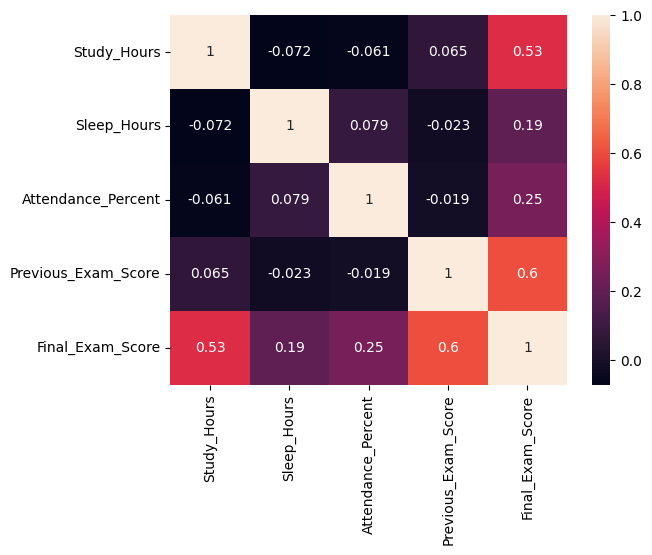

In [9]:
#seeing corelation
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
df.columns

Index(['Study_Hours', 'Sleep_Hours', 'Attendance_Percent',
       'Previous_Exam_Score', 'Final_Exam_Score'],
      dtype='object')

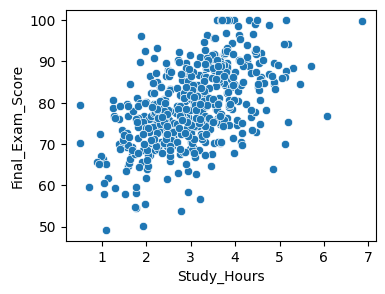

In [ ]:
#relation between study hours and final exam score
plt.figure(figsize=(3,2))
sns.scatterplot(x='Study_Hours', y='Final_Exam_Score', data=df)
plt.show()

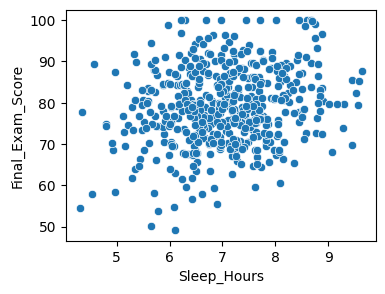

In [12]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Sleep_Hours', y='Final_Exam_Score', data=df)
plt.show()

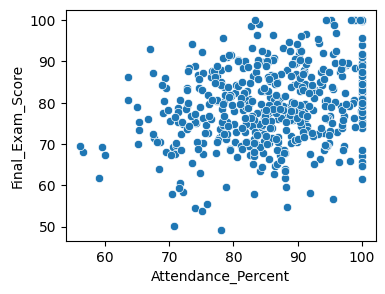

In [13]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Attendance_Percent', y='Final_Exam_Score', data=df)
plt.show()

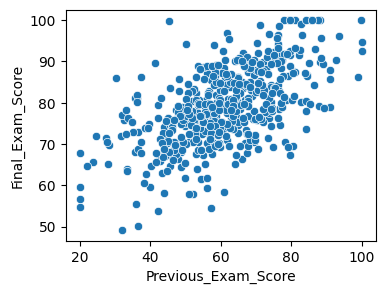

In [14]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Previous_Exam_Score', y='Final_Exam_Score', data=df)
plt.show()

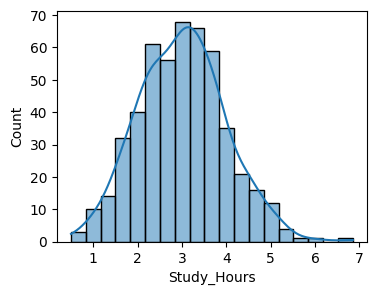

In [16]:
plt.figure(figsize=(4,3))
sns.histplot(df['Study_Hours'], kde=True)
plt.show()

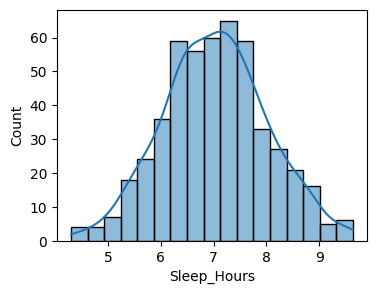

In [17]:
plt.figure(figsize=(4,3))
sns.histplot(df['Sleep_Hours'], kde=True)
plt.show()

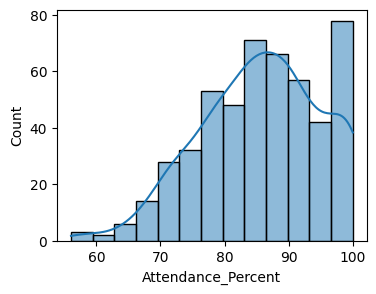

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(df['Previous_Exam_Score'], kde=True)
plt.show()

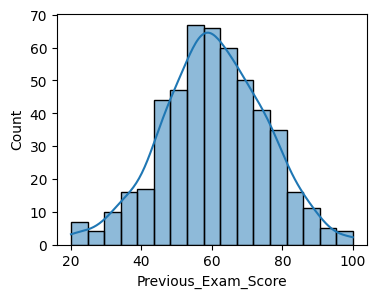

In [19]:
plt.figure(figsize=(4,3))
sns.histplot(df['Previous_Exam_Score'], kde=True)
plt.show()

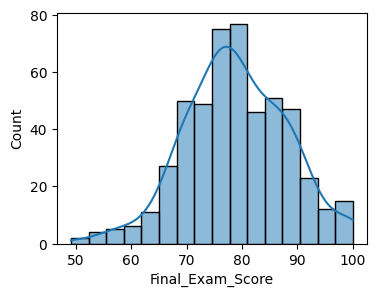

In [20]:
plt.figure(figsize=(4,3))
sns.histplot(df['Final_Exam_Score'], kde=True)
plt.show()